## Geomteric Transformation
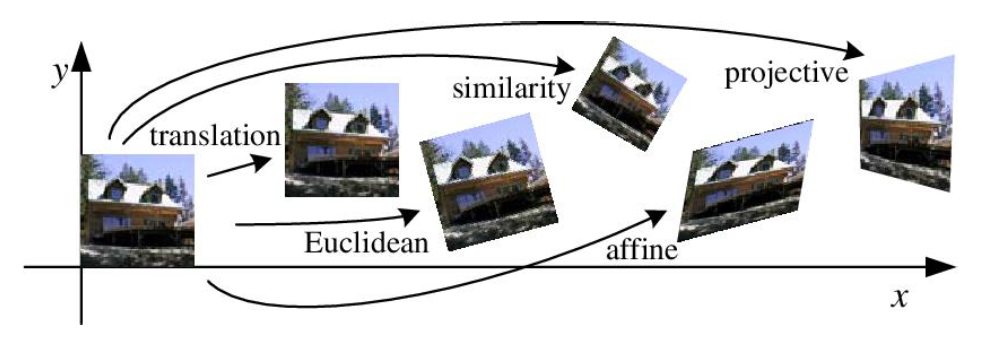

### 1.Translation transformation
**```cv2.warpAffine(src,M,dsize,dst=None, flags=None,borderMode=None,borderValue=None) -> dst ```**
 - M : 2*3 어파인 변환 행렬(실수형)
 - dsize : 결과 영상 크기
 - flgas : 보간법 , cv2.INTER_LINEAR
 - borderMode : 가장자리 픽셀확장 방식. cv2.BORDER_CONSTANT
 - borderValue : cv2.BORDER_CONSTANT 일 때 사용하는 상수값, 기본 0 
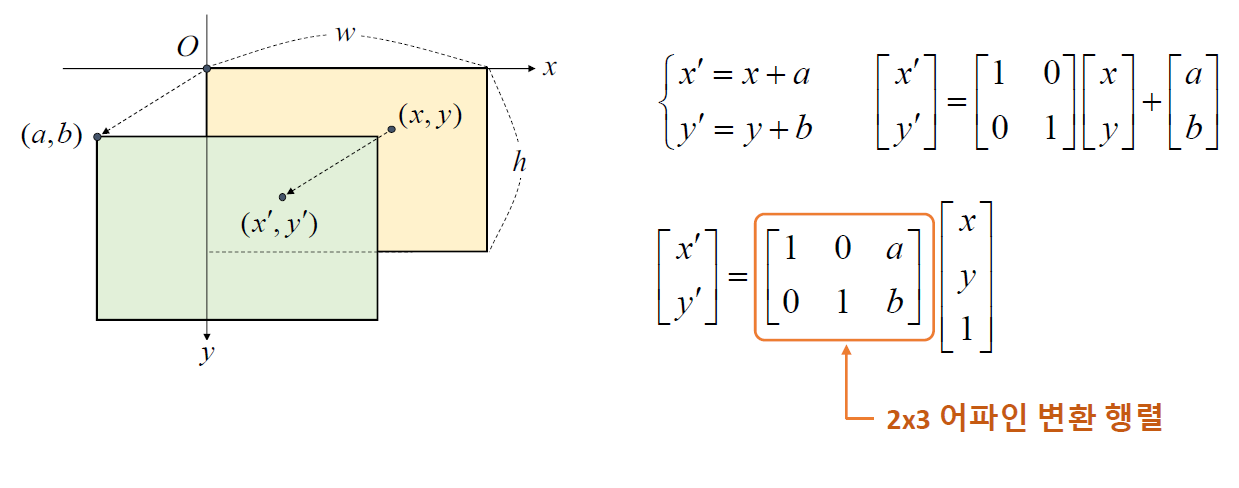

In [2]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch05\\tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

aff = np.array([[1, 0, 200],
                [0, 1, 100]], 
               dtype=np.float32)# dtype 필수

dst = cv2.warpAffine(src, aff, (0, 0)) # (0,0) 이라 dst 랑 src 사이즈 같다 

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


### 2. Shear Transformation
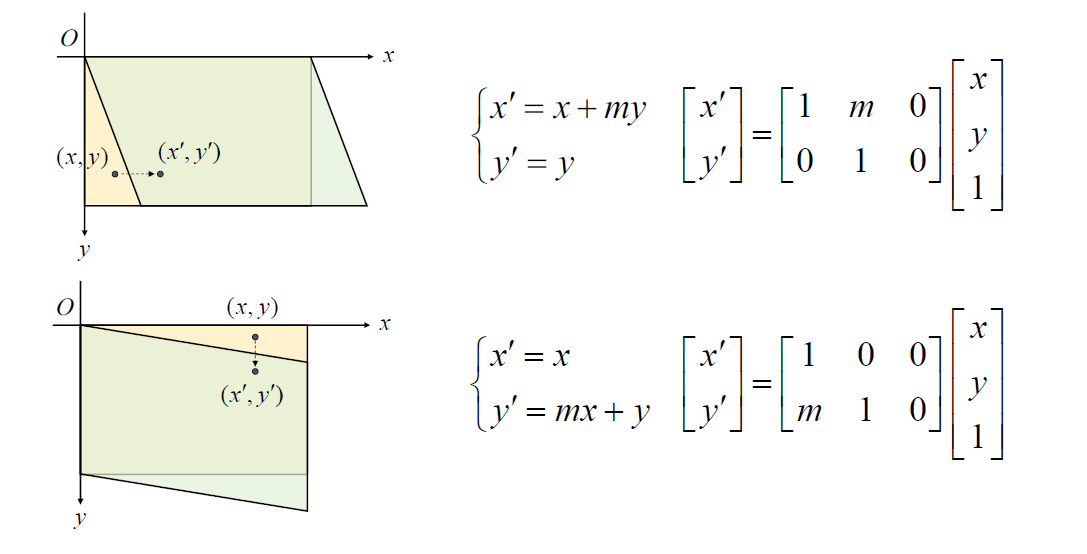

In [4]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch05\\tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

aff = np.array([[1, 0.5, 0],
                [0, 1, 0]], dtype=np.float32)

h, w = src.shape[:2]
dst = cv2.warpAffine(src, aff, (w + int(h * 0.5), h)) # 전체영상이 나오도록 dst의 크기 설정

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


### 3. Scale transformation
**``` cv2.resize(src,dsize,dst=None, fx=None, fy=None, interplation = None) -> dst ```**
 - dsize : 결과 영상 크기 
 - fx,fy : x,y 방향 스케일 비율 (dsize가 0 일 때 유효)
 - interplation : 보간법. 
   - cv2.INTER_NEAREST (최근방)
   - cv2.INTER_LINEAR (2*2)
   - cv2.INTER_CUBIC  (4*4)
   - cv2.INTER_LANCZOS4 (8*8)
   - cv2.INTER_AREA (영상 축소시 사용)
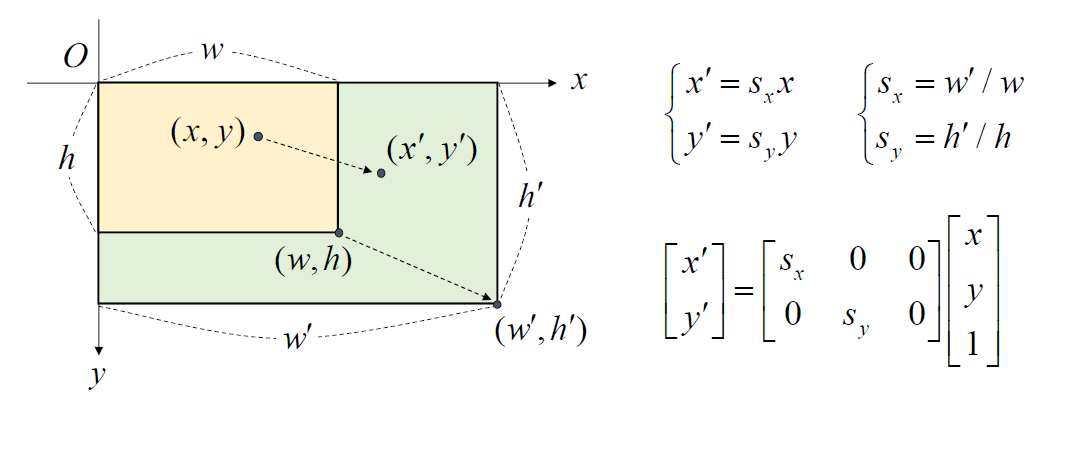

```영상축소시 INTER_AREA를 사용. 바로 축소하게 되면 픽셀 소실되므로 , blur 후 축수하거나, 다단계로 축소하는 방법 사용```

In [7]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch05\\rose.bmp') # src.shape=(320, 480)

if src is None:
    print('Image load failed!')
    sys.exit()

dst1 = cv2.resize(src, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (1920, 1280))  # cv2.INTER_LINEAR
dst3 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_CUBIC)
dst4 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_LANCZOS4)

cv2.imshow('src', src)
cv2.imshow('INTER_NEAREST', dst1[500:900, 400:800])
cv2.imshow('INTER_LINEAR', dst2[500:900, 400:800])
cv2.imshow('INTER_CUBIC', dst3[500:900, 400:800])
cv2.imshow('INTER_LANCZOS4', dst4[500:900, 400:800])
cv2.waitKey()
cv2.destroyAllWindows()


### 4.영상대칭 
```cv2.flip(src, flipcode, dst=None)->dst```
 - flipcode : -1 (좌우상하) , 0 (상하) 1(좌우) 

## 이미지파라미드
 - 하나의 영상에 대해 다양한 해상도의 영상 세트를 구성한 것 
 - 가우시안 블러링  & downsampling 형태로 축소 

**``` cv2.pyrDown(src,dst=None, dstsize=None, borderType=None) -> dst ```**

**``` cv2.pyrUp(src,dst=None, dstsize=None, borderType=None) -> dst ```**

 - dstsize: 출력영상크기, 지정안하면 가로세로 1/2씩 설정
   - 먼저 5*5 가우시안 적용 후 짝수행과 열을 제거하여 작은 크기 영상 생성



In [12]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch05\\cat.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()


rc = (250, 120, 200, 200)  # rectangle tuple

# 원본 영상에 그리기
cpy = src.copy()
cv2.rectangle(cpy, rc, (0, 0, 255), 2)
cv2.imshow('src', cpy)
cv2.waitKey()

# 피라미드 영상에 그리기
for i in range(1, 4):
    src = cv2.pyrDown(src)
    cpy = src.copy()
    cv2.rectangle(cpy, rc, (0, 0, 255), 2, shift=i)
    cv2.imshow('src', cpy)
    cv2.waitKey()
    cv2.destroyWindow('src')

cv2.destroyAllWindows()


### 05. rotation Transformation
 - 영상을 특정 각도만큼 반시계방향으로 회전
 
**``` cv2.getRotationMatrix2D(center, angle,scale) -> retval ```**
   - center : 회전 중심 좌표 (x,y) 
   - angle : 회전 각(음수는 시계방향))
   - scale : 추가적 확대 비율
   - dst : 2*3 어파인 변환 행렬 , 실수형 
   - angle과 sacle정보를 계산해서 martix를 얻는다 (아래)
     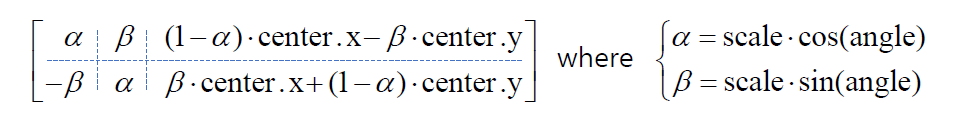
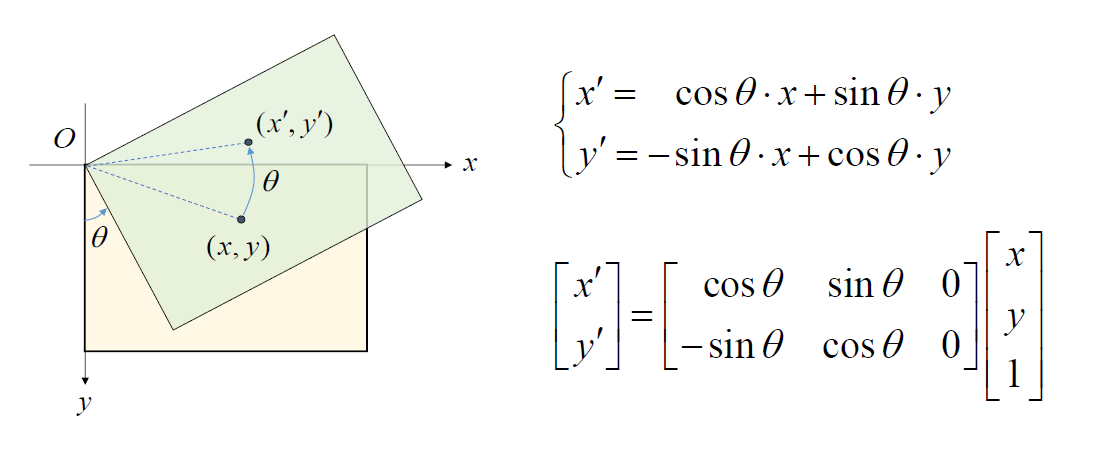

In [13]:
import sys
import math
import numpy as np
import cv2


src = cv2.imread('.\\ch05\\tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

rad = 20 * math.pi / 180
aff = np.array([[math.cos(rad), math.sin(rad), 0],
                [-math.sin(rad), math.cos(rad), 0]], dtype=np.float32)

dst = cv2.warpAffine(src, aff, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


In [14]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch05\\tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

cp = (src.shape[1] / 2, src.shape[0] / 2)
rot = cv2.getRotationMatrix2D(cp, 20, 0.5)

dst = cv2.warpAffine(src, rot, (0, 0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


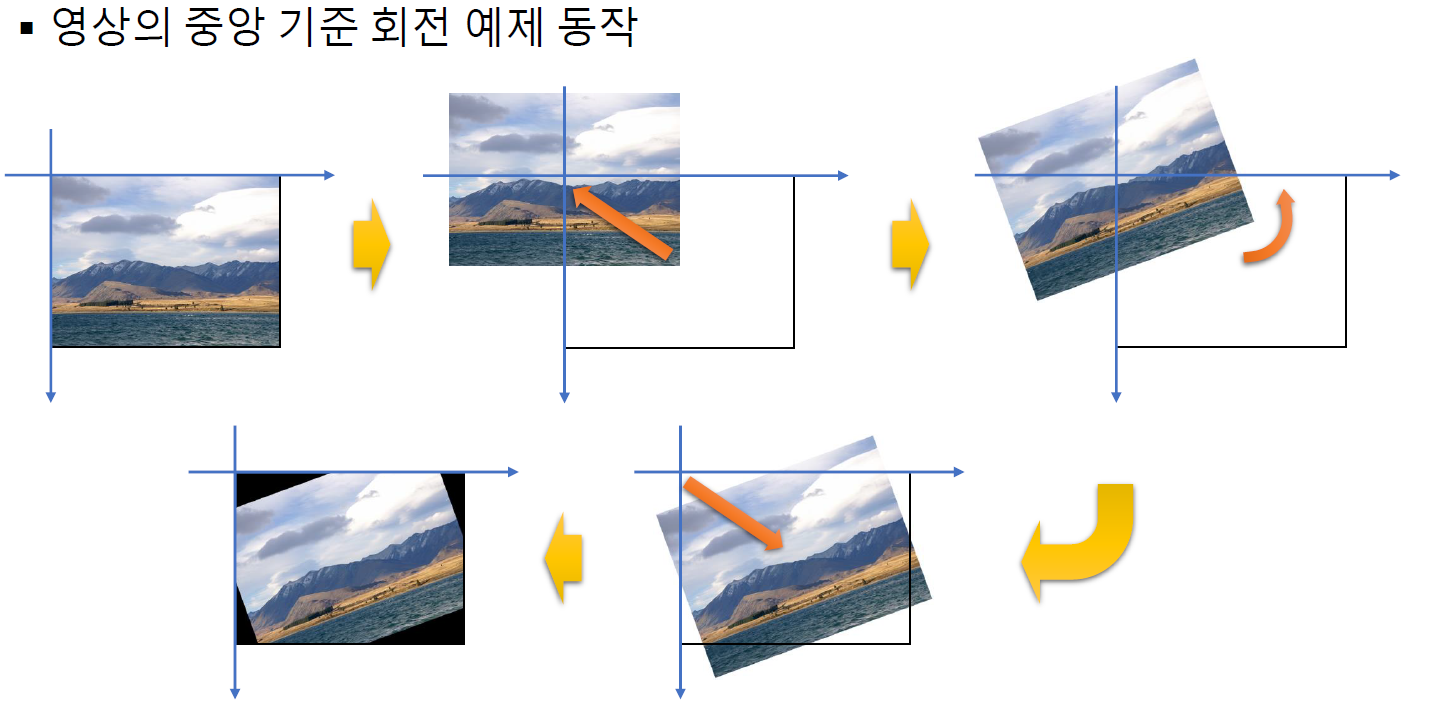

### Affine Transform
 - translation, shear, scaling, Rotation, parallelograms
 - 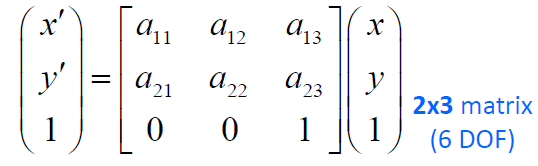
 
### Perspective  Transform
 - trapazoid
 - 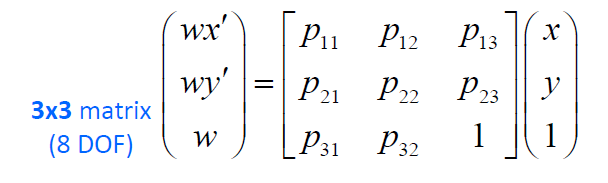

Affine vs Perspective  
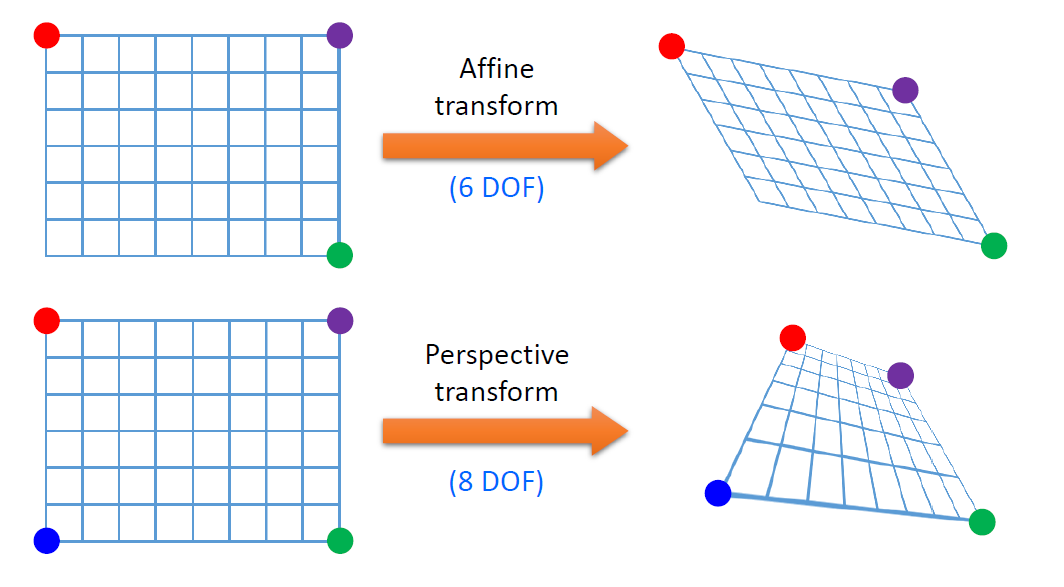

**``` cv2.getPerspectiveTransform(src,dst,soverMethod=none) -> retval ```**
  - (선택된) 점들간의 관계를 통해 matrix를 만들겠다 (cf.cv2.getRotationMatrix2D)

**``` cv2.warpPerspective(src,M, dsize,dst=None, flags=None, borderMode = None, borderValue) -> dst ```**
  - M : 3*3 투시 변환 행렬 (실수형) 
  - dsize : 결과 영상 크기 
  - flags : 보간법 
  - borderMode/ borderValue : 가장자리 픽셀 확장 방식



In [15]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch05\\namecard.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

w, h = 720, 400
srcQuad = np.array([[325, 307], [760, 369], [718, 611], [231, 515]], np.float32)
# 좌상, 우상, 우하 , 좌하 (좌측상단에서 시계방향으로)
dstQuad = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], np.float32)

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (w, h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()
 

### remapping
```dst(x,y) = src(map_x(x,y) , map_y(x,y))```
 - (왼쪽, 이동) , (오른쪽, 대칭)
   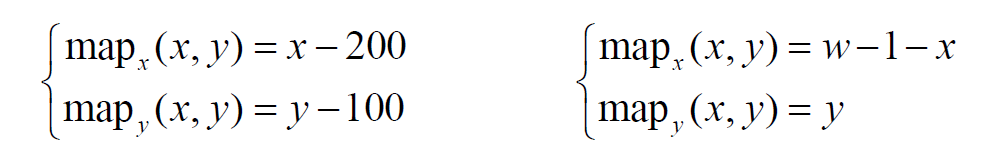
**``` cv2.remap(src,map1,map2,interpolation, dst=None, borderMode = None, borderValue=None) -> dst```**


In [16]:
import sys
import numpy as np
import cv2


src = cv2.imread('.\\ch05\\tekapo.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

h, w = src.shape[:2]

map2, map1 = np.indices((h, w), dtype=np.float32)
map2 = map2 + 10 * np.sin(map1 / 32)

dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


### 실전코딩
 - 문서 스캐너 

In [17]:
import sys
import numpy as np
import cv2


def drawROI(img, corners):
    cpy = img.copy()

    c1 = (192, 192, 255)
    c2 = (128, 128, 255)

    for pt in corners:
        cv2.circle(cpy, tuple(pt.astype(int)), 25, c1, -1, cv2.LINE_AA)

    cv2.line(cpy, tuple(corners[0].astype(int)), tuple(corners[1].astype(int)), c2, 2, cv2.LINE_AA)
    cv2.line(cpy, tuple(corners[1].astype(int)), tuple(corners[2].astype(int)), c2, 2, cv2.LINE_AA)
    cv2.line(cpy, tuple(corners[2].astype(int)), tuple(corners[3].astype(int)), c2, 2, cv2.LINE_AA)
    cv2.line(cpy, tuple(corners[3].astype(int)), tuple(corners[0].astype(int)), c2, 2, cv2.LINE_AA)

    disp = cv2.addWeighted(img, 0.3, cpy, 0.7, 0)

    return disp


def onMouse(event, x, y, flags, param):
    global srcQuad, dragSrc, ptOld, src

    if event == cv2.EVENT_LBUTTONDOWN:
        for i in range(4):
            if cv2.norm(srcQuad[i] - (x, y)) < 25:
                dragSrc[i] = True
                ptOld = (x, y)
                break

    if event == cv2.EVENT_LBUTTONUP:
        for i in range(4):
            dragSrc[i] = False

    if event == cv2.EVENT_MOUSEMOVE:
        for i in range(4):
            if dragSrc[i]:
                dx = x - ptOld[0]
                dy = y - ptOld[1]

                srcQuad[i] += (dx, dy)

                cpy = drawROI(src, srcQuad)
                cv2.imshow('img', cpy)
                ptOld = (x, y)
                break


# 입력 이미지 불러오기
src = cv2.imread('.\\ch05\\scanned.jpg')

if src is None:
    print('Image open failed!')
    sys.exit()

# 입력 영상 크기 및 출력 영상 크기
h, w = src.shape[:2]
dw = 500
dh = round(dw * 297 / 210)  # A4 용지 크기: 210x297cm

# 모서리 점들의 좌표, 드래그 상태 여부
srcQuad = np.array([[30, 30], [30, h-30], [w-30, h-30], [w-30, 30]], np.float32)
dstQuad = np.array([[0, 0], [0, dh-1], [dw-1, dh-1], [dw-1, 0]], np.float32)
dragSrc = [False, False, False, False]

# 모서리점, 사각형 그리기
disp = drawROI(src, srcQuad)

cv2.imshow('img', disp)
cv2.setMouseCallback('img', onMouse)

while True:
    key = cv2.waitKey()
    if key == 13:  # ENTER 키
        break
    elif key == 27:  # ESC 키
        cv2.destroyWindow('img')
        sys.exit()

# 투시 변환
pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (dw, dh), flags=cv2.INTER_CUBIC)

# 결과 영상 출력
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()
